In [1]:
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("vehicle_updates.csv", usecols=range(12), on_bad_lines='skip')
data.tail()

C:\Users\manle\AppData\Local\Temp\ipykernel_6500\1908272214.py:1: DtypeWarning: Columns (4,5,6,7,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("vehicle_updates.csv", usecols=range(12), on_bad_lines='skip')


,timestamp_utc,vehicle_id,trip_id,route_id,lat,lon,speed,heading,vehicle_timestamp,stop_id,current_stop_sequence,delay_seconds
24955442,2025-11-13 08:38:08,VehiclePosition-BKK_106,D07155201,2121,47.480010986328125,19.0673885345459,0.0,54.0,2025-11-13 08:37:56,NaN,0,0
24955443,2025-11-13 08:38:08,VehiclePosition-BKK_107,D056051228,2130,47.477054595947266,19.045448303222656,2.5722200870513916,61.0,2025-11-13 08:37:56,008005,33,0
24955444,2025-11-13 08:38:08,VehiclePosition-BKK_109,D0529866,0320,47.50166320800781,19.13582420349121,0.0,171.0,2025-11-13 08:37:38,NaN,0,0
24955445,2025-11-13 08:38:08,VehiclePosition-BKK_113,D0529878,0320,47.53334426879883,19.067298889160156,0.0,15.0,2025-11-13 08:37:53,F02605,0,0
24955446,2025-11-13 08:38:08,VehiclePosition-BKK_114,D06142261,0070,47.49060821533203,19.04854965209961,9.2599916458,NaN,NaN,NaN,NaN,NaN


In [5]:
data_export = data.iloc[:100000]
data_export.to_csv("vehicle_updates_sample.csv", index=False)

In [6]:
data.head()

,timestamp_utc,vehicle_id,trip_id,route_id,lat,lon,speed,heading,vehicle_timestamp,stop_id,current_stop_sequence,delay_seconds
0,2025-10-16 14:39:27,VehiclePosition-BKK_100,D0477613651,1050,47.517323,19.073917,6.687772,322.0,2025-10-16 14:39:14,F01059,19,0
1,2025-10-16 14:39:27,VehiclePosition-BKK_1002,C91341102,2170,47.483334,19.127817,0.0,332.0,2025-10-16 14:39:11,NaN,0,0
2,2025-10-16 14:39:27,VehiclePosition-BKK_101,C95520687,2121,47.47868,19.031557,0.0,162.0,2025-10-16 14:39:01,F02122,16,0
3,2025-10-16 14:39:27,VehiclePosition-BKK_1017,C889321206,0680,47.487255,19.179697,1.543332,280.0,2025-10-16 14:39:10,F01603,7,0
4,2025-10-16 14:39:27,VehiclePosition-BKK_102,D029769537,2210,47.50444,18.998335,10.28888,311.0,2025-10-16 14:39:13,F02391,7,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24955447 entries, 0 to 24955446
Data columns (total 12 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   timestamp_utc          object
 1   vehicle_id             object
 2   trip_id                object
 3   route_id               object
 4   lat                    object
 5   lon                    object
 6   speed                  object
 7   heading                object
 8   vehicle_timestamp      object
 9   stop_id                object
 10  current_stop_sequence  object
 11  delay_seconds          object
dtypes: object(12)
memory usage: 2.2+ GB


In [15]:
data['timestamp_utc'] = pd.to_datetime(data['timestamp_utc'], errors='coerce')
invalid_rows = data['timestamp_utc'].isna().sum()
invalid_rows

5

In [16]:
data = data.dropna(subset=['timestamp_utc'])

In [17]:
cutoff_date = '2025-10-31 23:59:59'
df_filtered = data[data['timestamp_utc'] <= cutoff_date]

In [18]:
df_filtered.tail()

,timestamp_utc,vehicle_id,trip_id,route_id,lat,lon,speed,heading,vehicle_timestamp,stop_id,current_stop_sequence,delay_seconds
23736311,2025-10-31 23:59:44,VehiclePosition-BKK_945514151196,3610_151,S60,47.49316,19.147751,10.277778,91.0,2025-10-31 23:59:35,005510074_0,3,0
23736312,2025-10-31 23:59:44,VehiclePosition-BKK_945518150020,2398_12,S70,47.804409,18.906099,22.5,327.0,2025-10-31 23:59:02,005540865_0,19,0
23736313,2025-10-31 23:59:44,VehiclePosition-BKK_945518150194,3388_6,S60,47.39315,19.76594,10.277778,133.0,2025-10-31 23:59:18,005542234_0,17,0
23736314,2025-10-31 23:59:44,VehiclePosition-BKK_945518150228,2648_5,S50,47.191189,19.7801,30.0,119.0,2025-10-31 23:59:30,005513722_0,19,0
23736315,2025-10-31 23:59:44,VehiclePosition-BKK_955514160303,2978_16,S21,47.16848,19.372351,16.388889,132.0,2025-10-31 23:59:30,005516865_0,15,0


In [19]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23736316 entries, 0 to 23736315
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   timestamp_utc          datetime64[ns]
 1   vehicle_id             object        
 2   trip_id                object        
 3   route_id               object        
 4   lat                    object        
 5   lon                    object        
 6   speed                  object        
 7   heading                object        
 8   vehicle_timestamp      object        
 9   stop_id                object        
 10  current_stop_sequence  object        
 11  delay_seconds          object        
dtypes: datetime64[ns](1), object(11)
memory usage: 2.3+ GB


In [20]:
df_filtered.to_csv("vehicle_updates_filtered.csv", index=False)

In [21]:
DATA_PATH = '../data/vehicle_updates_filtered.csv'
STOPS_PATH = '../data/stop_times.txt'

In [18]:
df_filtered = pd.read_csv(DATA_PATH)

In [ ]:
DF_IN_MEMORY = df_filtered
BATCH_SIZE = 500_000

def time_str_to_seconds(t_str):
    try:
        parts = t_str.split(':')
        return int(parts[0]) * 3600 + int(parts[1]) * 60 + int(parts[2])
    except:
        return np.nan
    
def prepare_stop_times(path):
    cols = ['trip_id', 'stop_id', 'stop_sequence', 'arrival_time']
    stops = pd.read_csv(path, usecols=lambda c: c in cols, dtype={'trip_id': str, 'stop_id': str})
    
    stops['planned_sec'] = stops['arrival_time'].apply(time_str_to_seconds)
    
    return stops[['trip_id', 'stop_id', 'stop_sequence', 'planned_sec']]

def calculate_delay_on_chunk(chunk, stops_df):
    chunk['trip_id'] = chunk['trip_id'].astype(str)
    chunk['stop_id'] = chunk['stop_id'].astype(str)
    
    merged = pd.merge(chunk, stops_df, 
                      left_on=['trip_id', 'stop_id', 'current_stop_sequence'],
                      right_on=['trip_id', 'stop_id', 'stop_sequence'],
                      how='left')
    
    if not np.issubdtype(merged['vehicle_timestamp'].dtype, np.datetime64):
        v_ts = pd.to_datetime(merged['vehicle_timestamp'], errors='coerce')
    else:
        v_ts = merged['vehicle_timestamp']
    
    if v_ts.dt.tz is None:
        v_ts = v_ts.dt.tz_localize('UTC')
    
    v_ts_local = v_ts.dt.tz_convert('Europe/Budapest')
    
    actual_sec = v_ts_local.dt.hour * 3600 + v_ts_local.dt.minute * 60 + v_ts_local.dt.second
    
    delay_series = actual_sec - merged['planned_sec']
    delay = delay_series.to_numpy()
    
    delay = np.where(delay < -43200, delay + 86400, delay)
    delay = np.where(delay > 43200, delay - 86400, delay)
    
    delay = np.nan_to_num(delay, nan=0)
    
    return delay.astype(int)

In [22]:
stops_lookup = prepare_stop_times(STOPS_PATH)

In [ ]:
chunks = np.array_split(DF_IN_MEMORY, len(DF_IN_MEMORY) // BATCH_SIZE + 1)

print(f"Feldolgozás indítása {len(chunks)} részletben...")

results = []
start_global = time.time()

for i, chunk in enumerate(tqdm(chunks, desc="Számolás")):
    delays = calculate_delay_on_chunk(chunk.copy(), stops_lookup)
    results.append(delays)
    
    if i % 10 == 0:
        elapsed = time.time() - start_global
        print(f"  -> {i+1}/{len(chunks)} csomag kész ({elapsed:.1f}s)")

print("Eredmények összefűzése...")
DF_IN_MEMORY['delay_seconds'] = np.concatenate(results)

print("KÉSZ! A 'delay_seconds' oszlop frissítve.")
print(DF_IN_MEMORY[['vehicle_timestamp', 'trip_id', 'delay_seconds']].head())

c:\Users\manle\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Feldolgozás indítása 48 részletben...


Számolás:   0%|          | 0/48 [00:00<?, ?it/s]

  -> 1/48 csomag kész (3.2s)
  -> 11/48 csomag kész (23.1s)
  -> 21/48 csomag kész (42.9s)
  -> 31/48 csomag kész (62.6s)
  -> 41/48 csomag kész (82.4s)
Eredmények összefűzése...
KÉSZ! A 'delay_seconds' oszlop frissítve.
     vehicle_timestamp      trip_id  delay_seconds
0  2025-10-16 14:39:14  D0477613651            674
1  2025-10-16 14:39:11    C91341102              0
2  2025-10-16 14:39:01    C95520687            361
3  2025-10-16 14:39:10   C889321206             70
4  2025-10-16 14:39:13   D029769537             73


In [24]:
df_filtered = DF_IN_MEMORY

In [25]:
data_to_plot = df_filtered.copy()
plot_df = data_to_plot[data_to_plot['delay_seconds'] != 0].copy()
plot_df['ts_local'] = pd.to_datetime(plot_df['vehicle_timestamp'])
if plot_df['ts_local'].dt.tz is None:
    plot_df['ts_local'] = plot_df['ts_local'].dt.tz_localize('UTC').dt.tz_convert('Europe/Budapest')


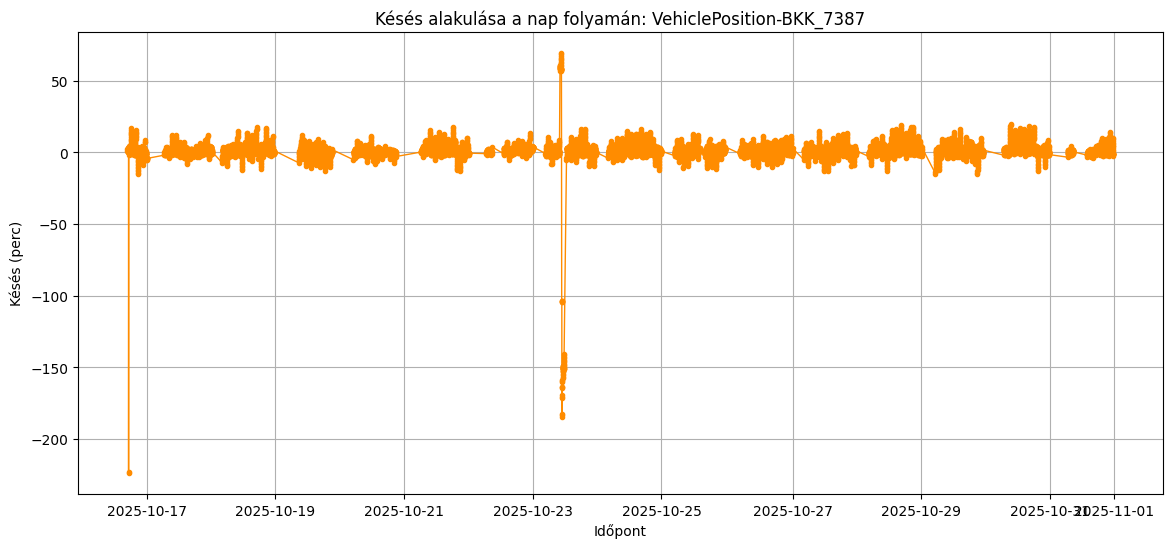

In [26]:
top_vehicle = plot_df['vehicle_id'].value_counts().idxmax()
single_vehicle_data = plot_df[plot_df['vehicle_id'] == top_vehicle].sort_values('ts_local')

plt.figure(figsize=(14, 6))
plt.plot(single_vehicle_data['ts_local'], single_vehicle_data['delay_seconds'] / 60, 
         marker='o', markersize=3, linestyle='-', linewidth=1, color='darkorange')
plt.title(f'Késés alakulása a nap folyamán: {top_vehicle}')
plt.xlabel('Időpont')
plt.ylabel('Késés (perc)')
plt.grid(True)
plt.show()

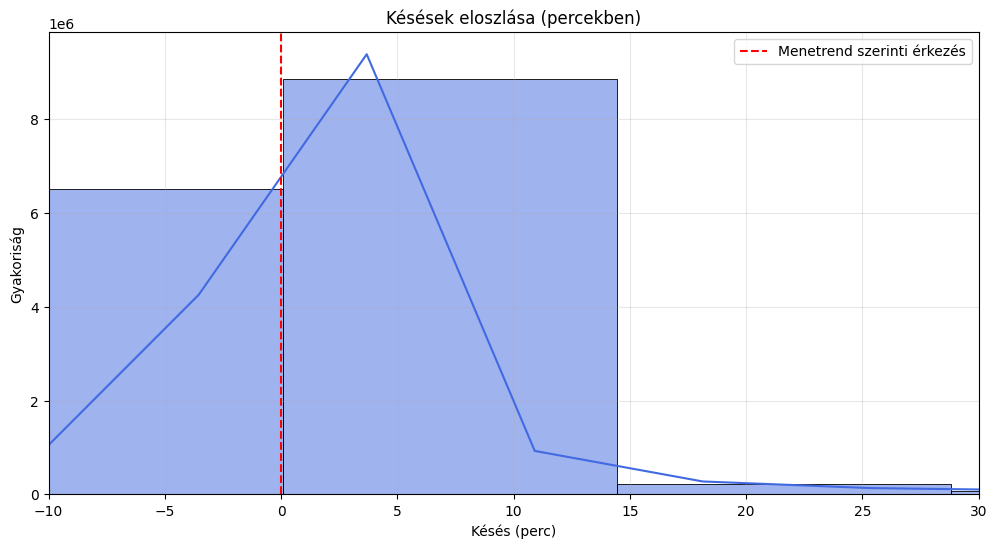

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(plot_df['delay_seconds'] / 60, bins=100, kde=True, color='royalblue')
plt.title('Késések eloszlása (percekben)')
plt.xlabel('Késés (perc)')
plt.ylabel('Gyakoriság')
plt.xlim(-10, 30)  
plt.axvline(0, color='red', linestyle='--', label='Menetrend szerinti érkezés')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\manle\AppData\Local\Temp\ipykernel_14100\3486730069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=plot_df['delay_seconds'] / 60, data=plot_df, palette="viridis", showfliers=False)


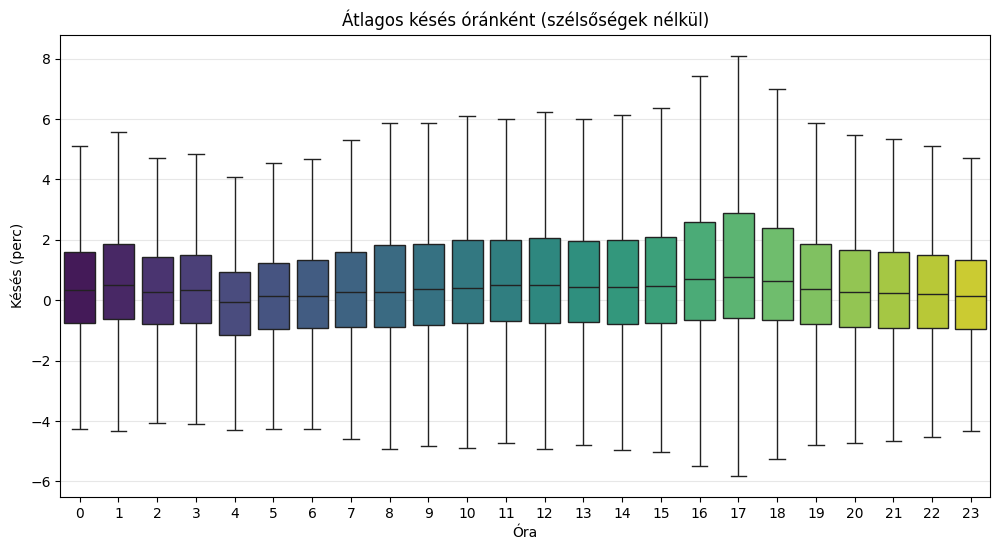

In [28]:
plot_df['hour'] = plot_df['ts_local'].dt.hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y=plot_df['delay_seconds'] / 60, data=plot_df, palette="viridis", showfliers=False)
plt.title('Átlagos késés óránként (szélsőségek nélkül)')
plt.xlabel('Óra')
plt.ylabel('Késés (perc)')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

In [29]:
EXPORT_PATH = '../data/vehicle_updates_with_delays.csv'
df_filtered.to_csv(EXPORT_PATH, index=False)